Erstellt Kuchendiagramme für die Präsentation.

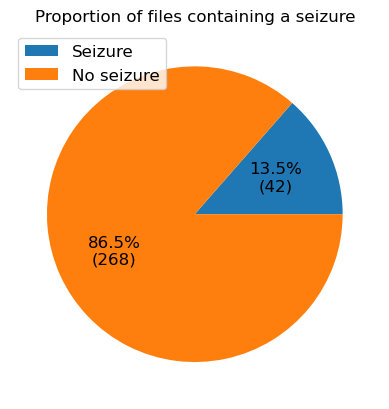

In [15]:
import os
import matplotlib.pyplot as plt

total_patients = set()
seizure_patients = set()

total_files = 0
seizure_files = 0

fontsize = 12


for root, dirs, files in os.walk('../../../../tuar/edf'):
    for file in files:
        if file.endswith('.edf'):
            total_files += 1
            total_patients.add(file.split('_')[0])
        if file.endswith('_seiz.csv'):
            seizure_files += 1
            seizure_patients.add(file.split('_')[0])

def make_autopct(sizes, pct_threshold=2):
    def autopct(pct):
        total = sum(sizes)
        val = int(round(pct*total/100.0))
        if pct > pct_threshold:
            return f'{pct:.1f}%\n({val})'
        else:
            return ''
    return autopct      

sizes = [seizure_files, total_files - seizure_files]

plt.title('Proportion of files containing a seizure', fontsize=fontsize)
wedges, _, _ = plt.pie(sizes, autopct=make_autopct(sizes), textprops={'fontsize': fontsize})
plt.legend(wedges, ['Seizure', 'No seizure'], fontsize=fontsize, loc='upper left')
plt.savefig('output/exp_04_08_seizure_file_distribution.pdf', bbox_inches='tight')
plt.show()

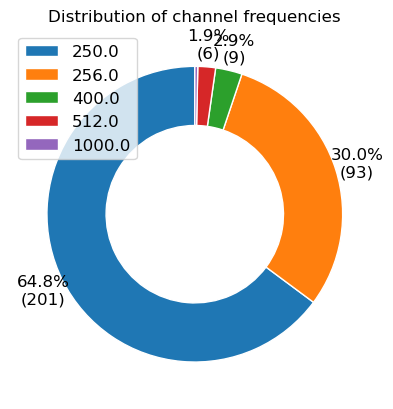

In [16]:
import matplotlib.pyplot as plt
import pyedflib
import os

sampling_frequencies = []

for root, dirs, files in os.walk('../../../../tuar/edf/'):
    for file in files:
        if file.endswith('.edf'):
            reader = pyedflib.EdfReader(os.path.join(root, file))
            sampling_frequencies.append(reader.getSampleFrequency(0))
            reader.close()

distinct_frequencies = sorted(list(set(sampling_frequencies)))
sizes = [sampling_frequencies.count(freq) for freq in distinct_frequencies]

plt.title("Distribution of channel frequencies", fontsize=fontsize)
wedges, _, _ = plt.pie(sizes, autopct=make_autopct(sizes, pct_threshold=1), wedgeprops=dict(width=0.4, edgecolor='w'), pctdistance=1.15, startangle=90, textprops={'fontsize': fontsize})
plt.legend(wedges, distinct_frequencies, fontsize=fontsize)
plt.savefig("./output/exp_04_08_sampling_frequencies.pdf", bbox_inches='tight')
plt.show()

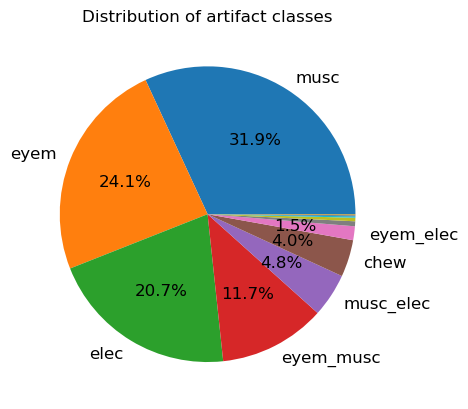

In [12]:
import matplotlib.pyplot as plt

total_artifact_count = 160_073

artifact_count_per_type = {
    "musc": 51_052,
    "eyem": 38_569,
    "elec": 33_130,
    "eyem_musc": 18_677,
    "musc_elec": 7_651,
    "chew": 6_482,
    "eyem_elec": 2_422,
    "eyem_chew": 864,
    "shiv": 613,
    "chew_musc": 243,
    "elpp": 172,
    "chew_elec": 152,
    "eyem_shiv": 45,
    "shiv_elec": 1,
}

def get_auto_pct(pct):
    """
        Returns the percentag if and only if it is greater than 1%. Otherwise, returns an empty string.
    """
    return f'{pct:.1f}%' if pct > 1 else ''

labels = [key if artifact_count_per_type[key] / total_artifact_count > 0.01 else '' for key in artifact_count_per_type.keys()]

plt.pie(artifact_count_per_type.values(), labels=labels, autopct=get_auto_pct, textprops={'fontsize': fontsize})
plt.title("Distribution of artifact classes", fontsize=fontsize)
plt.savefig("./output/exp_04_08_artifact_distribution.pdf", bbox_inches='tight')
plt.show()

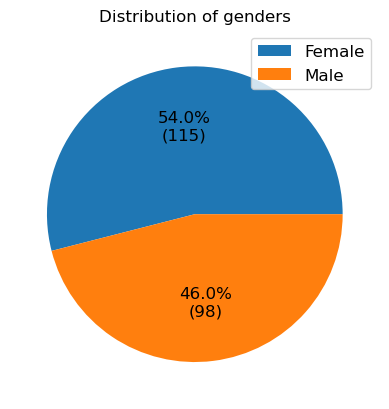

In [17]:
import pyedflib
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

unique_patient_files = set()
df = pd.DataFrame(columns=['sex', 'birthdate', 'name', 'age'])

for root, dirs, files in os.walk('../../../../tuar/edf/'):
    for file in files:
        # If the patient name did not occur yet, add the edf file path to the set
        if file.endswith('.edf') and file.split('_')[0] not in {os.path.basename(f).split('_')[0] for f in unique_patient_files}:
            unique_patient_files.add(os.path.join(root, file))

for i, file in enumerate(unique_patient_files):
    reader = pyedflib.EdfReader(file)
    if reader.patient:
        # Cast bytes to string and remove leading b' and trailing '
        splits = str(reader.patient)[2:-1].split(' ')
        df.loc[i] = [splits[1], splits[2], splits[3], splits[4].split(':')[-1]]
    reader.close()

sex_counts = df['sex'].value_counts()

plt.title(f"Distribution of genders", fontsize=fontsize)
wedges, _, _ = plt.pie(sex_counts, autopct=make_autopct(sex_counts), textprops={'fontsize': fontsize})
plt.legend(wedges, ['Female', 'Male'], fontsize=fontsize, loc='upper right')
plt.savefig('output/exp_04_08_gender_distribution.pdf', bbox_inches='tight')
plt.show()


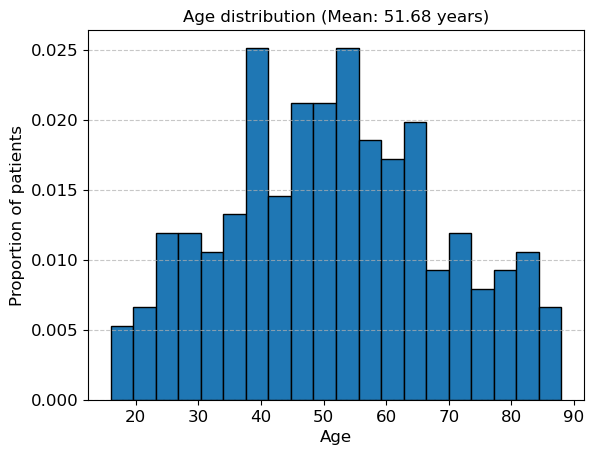

In [24]:

relevant_age_data = df[df['age'].astype(int) < 100]['age'].astype(int)
mean = np.mean(relevant_age_data).round(2)

fig, axes = plt.subplots()

axes.hist(relevant_age_data, edgecolor='black', bins=20, density=True)
axes.set_title(f"Age distribution (Mean: {mean} years)", fontsize=fontsize)
axes.set_xlabel('Age', fontsize=fontsize)
axes.set_ylabel('Proportion of patients', fontsize=fontsize)
axes.tick_params(axis='both', labelsize=fontsize)
axes.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.savefig('output/exp_04_08_age_distribution.pdf', bbox_inches='tight')
plt.show()